### 0. _Import Dependency_
Melakukan _import dependency_ yang diperlukan merupakan langkah awal sebelum melakukan praktikum. Untuk memudahkan mencari _dependency_ apa saja yang telah di-_import_, operasi _import dependency_ dilakukan dalam sebuah _cell_.

#### A. _Install Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [ ]:
pip install numpy scikit-image matplotlib

#### B. _Import Dependency_

In [1]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

### 1. _Color Transformation_
**_Color Transformation_** merupakan proses pemrosesan citra yang menggunakan transformasi warna.

#### 1.1. RGB

In [2]:
pathFromCurrent = 'Lab 2 - Images/'
def getPath(fileName):
    return pathFromCurrent + fileName

(-0.5, 625.5, 416.5, -0.5)

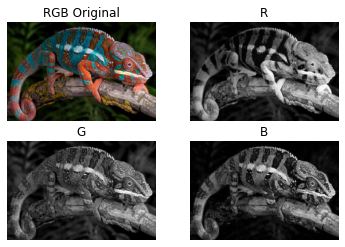

In [3]:
image = io.imread(getPath('chameleon.jpg'))
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

## Melakukan plotting citra RGB original
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('RGB Original')
plt.axis('off')

## Melakukan plotting citra Red yang dipetakan ke abu-abu
plt.subplot(2,2,2)
plt.imshow(R,cmap='gray',vmin=0,vmax=255)
plt.title('R')
plt.axis('off')

## Melakukan plotting citra Green yang dipetakan ke abu-abu
plt.subplot(2,2,3)
plt.imshow(G,cmap='gray',vmin=0,vmax=255)
plt.title('G')
plt.axis('off')

## Melakukan plotting citra Red yang dipetakan ke abu-abu
plt.subplot(2,2,4)
plt.imshow(B,cmap='gray',vmin=0,vmax=255)
plt.title('B')
plt.axis('off')


#### **1.2. CMY**

(-0.5, 625.5, 416.5, -0.5)

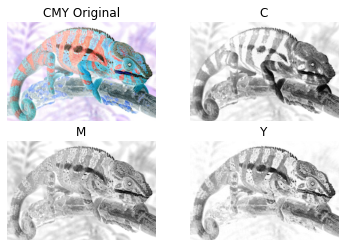

In [4]:
C = 1 - util.img_as_float(R)
M = 1 - util.img_as_float(G)
Y = 1 - util.img_as_float(B)
CMY = np.zeros(image.shape)
CMY[:,:,0] = C
CMY[:,:,1] = M
CMY[:,:,2] = Y

## Melakukan plotting citra CMY original
plt.subplot(2,2,1)
plt.imshow(CMY)
plt.title('CMY Original')
plt.axis('off')

## Melakukan plotting citra Cyan yang dipetakan ke abu-abu
plt.subplot(2,2,2)
plt.imshow(C,cmap='gray')
plt.title('C')
plt.axis('off')

## Melakukan plotting citra Magenta yang dipetakan ke abu-abu
plt.subplot(2,2,3)
plt.imshow(M,cmap='gray')
plt.title('M')
plt.axis('off')

## Melakukan plotting citra Yellow yang dipetakan ke abu-abu
plt.subplot(2,2,4)
plt.imshow(Y,cmap='gray')
plt.title('Y')
plt.axis('off')


#### **1.3. HSV**

(-0.5, 625.5, 416.5, -0.5)

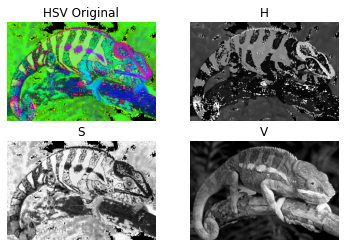

In [5]:
HSV = color.rgb2hsv(image)
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

## Melakukan plotting citra HSV original
plt.subplot(2,2,1)
plt.imshow(HSV)
plt.title('HSV Original')
plt.axis('off')

## Melakukan plotting citra Cyan yang dipetakan ke abu-abu
plt.subplot(2,2,2)
plt.imshow(H,cmap='gray')
plt.title('H')
plt.axis('off')

## Melakukan plotting citra Magenta yang dipetakan ke abu-abu
plt.subplot(2,2,3)
plt.imshow(S,cmap='gray')
plt.title('S')
plt.axis('off')

## Melakukan plotting citra Yellow yang dipetakan ke abu-abu
plt.subplot(2,2,4)
plt.imshow(V,cmap='gray')
plt.title('V')
plt.axis('off')


### **2. Historgram Processing**
#### **2.1. Contrast Stretching**
Seperti yang sudah disampaikan pada tutorial sebelumnya, histogram merupakan suatu teknik yang mampu memberikan deskripsi global pada tampilan citra, pada bagian color _contrast stretching_ dan _histogram equilization_ dapat digunakan untuk masing-masing bagian dari R, G, B dan seterusnya.

##### **2.1.1. RGB** 

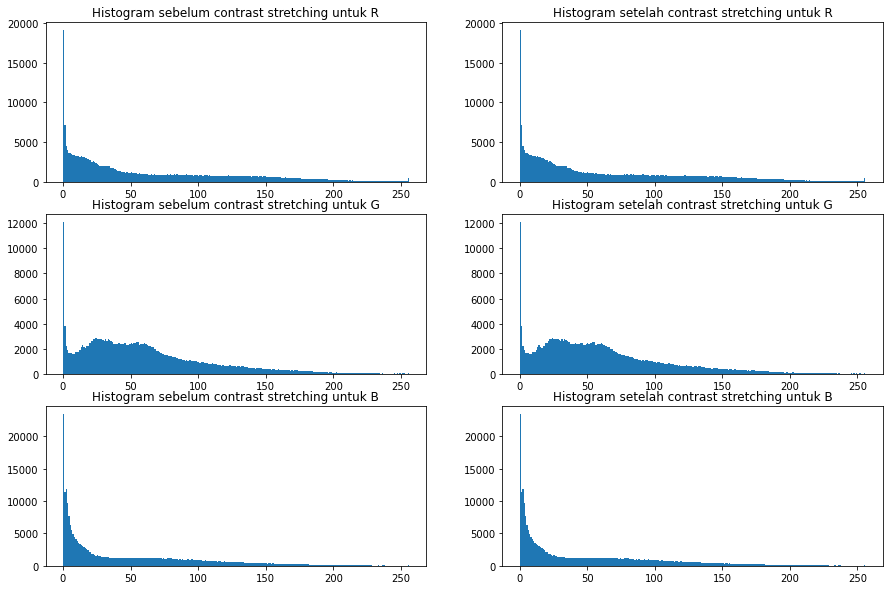

In [6]:
partisi_citra_RGB = [R, G, B]
partisi_citra_RGB_cs = []
labels = ['R', 'G', 'B']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,10))

cnt = 1
for x in partisi_citra_RGB:
    mn = min(x.flatten())
    mx = max(x.flatten())
    b = int(np.floor(255 / (mx-mn)))
    x_cs = (x - mn) * b
    ## Menyimpan hasil contrast stretching
    partisi_citra_RGB_cs.append(x_cs)
    
    ## Menampilkan histogram sebelum dilakukan contrast stretching
    plt.subplot(len(partisi_citra_RGB), 2, cnt)
    plt.title('Histogram sebelum contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 256, range=(0,256))
    
    ## Menampilkan histogram setelah dilakukan contrast stretching
    plt.subplot(len(partisi_citra_RGB), 2, cnt+1)
    plt.title('Histogram setelah contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x_cs.flatten(), 256, range=(0,256))
    
    cnt += 2

##### 2.1.2. CMY 

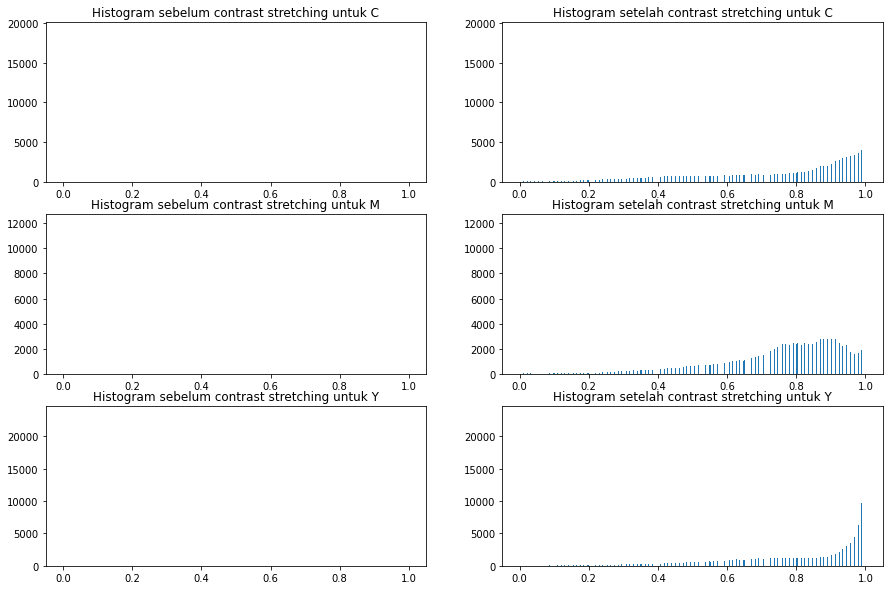

In [7]:
partisi_citra_CMY = [C, M, Y]
partisi_citra_CMY_cs = []
labels = ['C', 'M', 'Y']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,10))

cnt = 1
for x in partisi_citra_CMY:
    ## Melakukan konversi ke bentuk formal RGB
    x = util.img_as_ubyte(1-x)
    mn = min(x.flatten())
    mx = max(x.flatten())
    b = int(np.floor(255 / (mx-mn)))
    x_cs = (x - mn) * b
    
    ## Mengembalikan ke CMY
    x_cs = 1 - util.img_as_float(x_cs)
    
    ## Menyimpan hasil contrast stretching
    partisi_citra_CMY_cs.append(x_cs)
    
    ## Menampilkan histogram sebelum dilakukan contrast stretching
    plt.subplot(len(partisi_citra_CMY), 2, cnt)
    plt.title('Histogram sebelum contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 1000, range=(0,1))
    
    ## Menampilkan histogram setelah dilakukan contrast stretching
    plt.subplot(len(partisi_citra_CMY), 2, cnt+1)
    plt.title('Histogram setelah contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x_cs.flatten(), 1000, range=(0,1))
    
    cnt += 2

##### **2.1.3. HSV** 

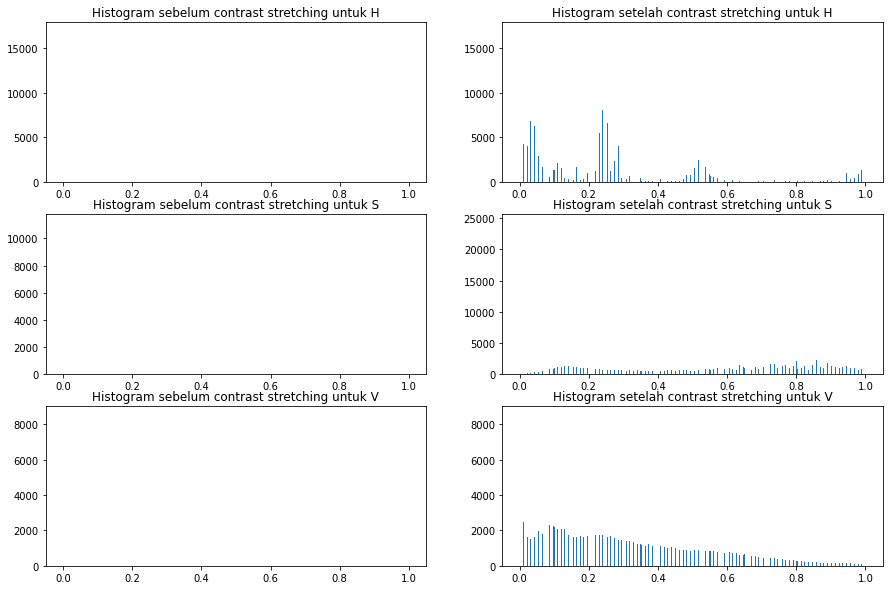

In [8]:
partisi_citra_HSV = [H, S, V]
partisi_citra_HSV_cs = []
labels = ['H', 'S', 'V']

## Menginisialisi subplot yang akan dihasilkan
plt.subplots(figsize=(15,10))

cnt = 1
for x in partisi_citra_HSV:
    ## Melakukan konversi ke bentuk formal RGB
    x = util.img_as_ubyte(x)
    mx = max(x.flatten())
    b = int(np.floor(255 / (mx-mn)))
    x_cs = (x - mn) * b
    
    ## Mengembalikan citra ke dalam bentuk float
    x_cs = util.img_as_float(x_cs)
    
    ## Menyimpan hasil contrast stretching
    partisi_citra_HSV_cs.append(x_cs)
    
    ## Menampilkan histogram sebelum dilakukan contrast stretching
    plt.subplot(len(partisi_citra_HSV), 2, cnt)
    plt.title('Histogram sebelum contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x.flatten(), 1000, range=(0,1))
    
    ## Menampilkan histogram setelah dilakukan contrast stretching
    plt.subplot(len(partisi_citra_HSV), 2, cnt+1)
    plt.title('Histogram setelah contrast stretching untuk %s' % (labels[cnt//2]))
    plt.hist(x_cs.flatten(), 1000, range=(0,1))
    
    cnt += 2

(-0.5, 625.5, 416.5, -0.5)

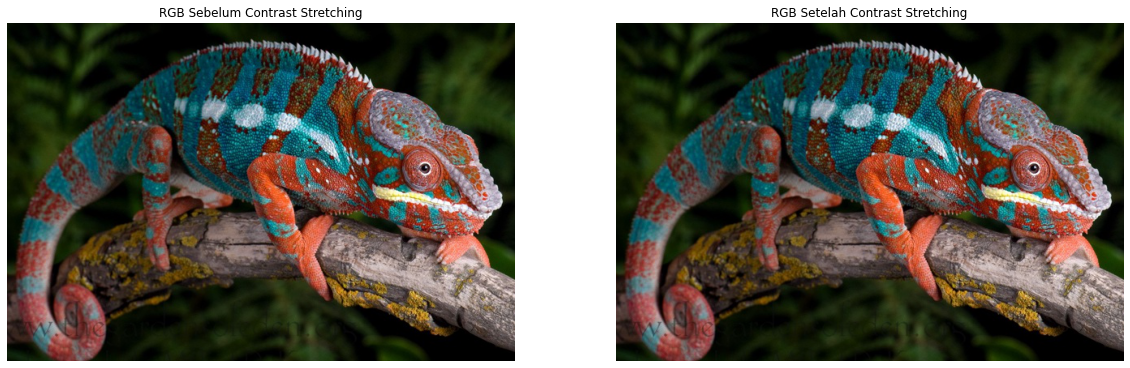

In [21]:
RGB_cs = util.img_as_ubyte(np.zeros(image.shape))
RGB_cs[:,:,0] = partisi_citra_RGB_cs[0]
RGB_cs[:,:,1] = partisi_citra_RGB_cs[1]
RGB_cs[:,:,2] = partisi_citra_RGB_cs[2]

RGB_normal = util.img_as_ubyte(np.zeros(image.shape))
RGB_normal[:,:,0] = partisi_citra_RGB[0]
RGB_normal[:,:,1] = partisi_citra_RGB[1]
RGB_normal[:,:,2] = partisi_citra_RGB[2]

# RGB_cs = util.img_as_ubyte(RGB_cs)
# RGB_normal = util.img_as_ubyte(RGB_normal)

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('RGB Sebelum Contrast Stretching')
plt.imshow(RGB_normal)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('RGB Setelah Contrast Stretching')
plt.imshow(RGB_cs)
plt.axis('off')

(-0.5, 625.5, 416.5, -0.5)

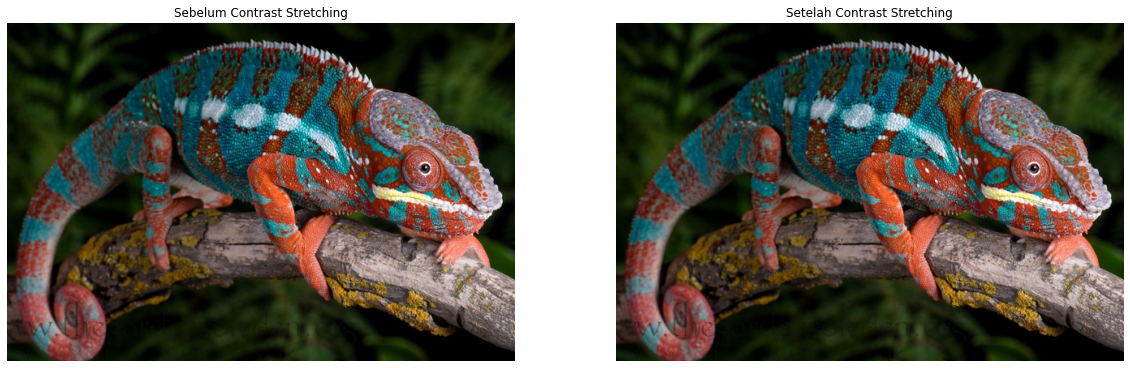

In [22]:
HSV_cs = color.rgb2hsv(util.img_as_ubyte(np.zeros(image.shape)))
HSV_cs[:,:,0] = partisi_citra_HSV_cs[0]
HSV_cs[:,:,1] = partisi_citra_HSV_cs[1]
HSV_cs[:,:,2] = partisi_citra_HSV_cs[2]
HSV_cs = color.hsv2rgb(HSV_cs)

HSV_normal = color.rgb2hsv(util.img_as_ubyte(np.zeros(image.shape)))
HSV_normal[:,:,0] = partisi_citra_HSV[0]
HSV_normal[:,:,1] = partisi_citra_HSV[1]
HSV_normal[:,:,2] = partisi_citra_HSV[2]
HSV_normal = color.hsv2rgb(HSV_normal)

plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Sebelum Contrast Stretching')
plt.imshow(HSV_normal)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Setelah Contrast Stretching')
plt.imshow(HSV_cs)
plt.axis('off')

#### 2.2 Histogram Equalization 